In [1]:
## importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('C:/Users/Nishkarsh/Desktop/Project/R Project/Attrition.csv')
pd.set_option('max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.shape

(1470, 35)

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
len(categorical_features)

9

In [8]:
numerical_features = [feature for feature in df.columns if feature not in categorical_features]
len(numerical_features)

26

In [9]:
#Checking value counts for categorical variables
for col in categorical_features:
    print(df[col].value_counts()) 

No     1233
Yes     237
Name: Attrition, dtype: int64
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Male      882
Female    588
Name: Gender, dtype: int64
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
Y    1470
Name: Over18, dtype: int64
No     1054
Yes     416
Name: Over

In [10]:
#Drop column Over18 as all values are Yes
df.drop('Over18', axis = 1, inplace = True)

In [11]:
#Checking number of distinct values for numerical variables
for col in numerical_features:
    print(col, df[col].nunique())

Age 43
DailyRate 886
DistanceFromHome 29
Education 5
EmployeeCount 1
EmployeeNumber 1470
EnvironmentSatisfaction 4
HourlyRate 71
JobInvolvement 4
JobLevel 5
JobSatisfaction 4
MonthlyIncome 1349
MonthlyRate 1427
NumCompaniesWorked 10
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 37
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18


In [12]:
#Drop these as there are only 1 type of value in whole variable
df.drop(['EmployeeCount','StandardHours'], axis = 1, inplace = True)

In [13]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
len(categorical_features)

8

In [14]:
numerical_features = [feature for feature in df.columns if feature not in categorical_features]
len(numerical_features)

24

In [15]:
# getting list of discrete numerical features
discrete_numerical_features = []
for col in numerical_features:
    if (df[col].nunique()<11):
        discrete_numerical_features.append(col)

In [16]:
len(discrete_numerical_features)

11

In [17]:
numerical_features = [feature for feature in numerical_features if feature not in discrete_numerical_features]
len(numerical_features)

13

In [18]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [19]:
df.describe(include = ['O'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


In [20]:
Attrition_mapping = {"Yes": 1, "No": 0}
df['Attrition'] = df['Attrition'].map(Attrition_mapping)

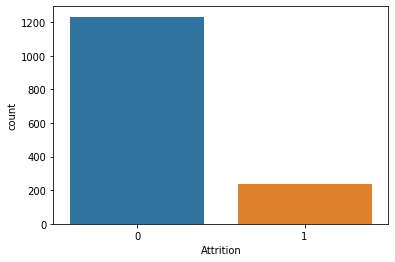

In [21]:
sns.countplot(df['Attrition'])

In [22]:
attrition = df[(df['Attrition'] != 0)]
no_attrition = df[(df['Attrition'] == 0)]
print('Percentage of Attrition: {}'.format(len(attrition)/len(df)))

Percentage of Attrition: 0.16122448979591836


In [23]:
df[['Gender', 'Attrition']].groupby(['Gender'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,Gender,Attrition
1,Male,0.170068
0,Female,0.147959


# Males have higher attrition rate than woman

In [24]:
df[['BusinessTravel', 'Attrition']].groupby(['BusinessTravel'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,BusinessTravel,Attrition
1,Travel_Frequently,0.249097
2,Travel_Rarely,0.149569
0,Non-Travel,0.080000


# People travel more frequently have much higher attrition rate than others

In [25]:
df[['Department', 'Attrition']].groupby(['Department'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,Department,Attrition
2,Sales,0.206278
0,Human Resources,0.190476
1,Research & Development,0.138398


# Sales and HR dept have higher attrition rate than R&D

In [26]:
df[['EducationField', 'Attrition']].groupby(['EducationField'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,EducationField,Attrition
0,Human Resources,0.259259
5,Technical Degree,0.242424
2,Marketing,0.220126
1,Life Sciences,0.146865
3,Medical,0.135776
4,Other,0.134146


In [27]:
df[['JobRole', 'Attrition']].groupby(['JobRole'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,JobRole,Attrition
8,Sales Representative,0.397590
2,Laboratory Technician,0.239382
1,Human Resources,0.230769
7,Sales Executive,0.174847
6,Research Scientist,0.160959
4,Manufacturing Director,0.068966
0,Healthcare Representative,0.068702
3,Manager,0.049020
5,Research Director,0.025000


# Sales Representatives have higher attrition rate

In [28]:
df[['MaritalStatus', 'Attrition']].groupby(['MaritalStatus'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,MaritalStatus,Attrition
2,Single,0.255319
1,Married,0.124814
0,Divorced,0.100917


# People with Marital Status as Single have much higher chance of attrition

In [29]:
df[['OverTime', 'Attrition']].groupby(['OverTime'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,OverTime,Attrition
1,Yes,0.305288
0,No,0.104364


# People working over time have higher attrition rate

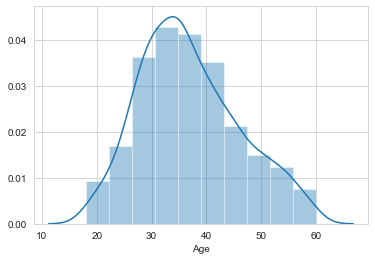

In [30]:
sns.set_style('whitegrid')
sns.distplot(df['Age'], bins = 10)

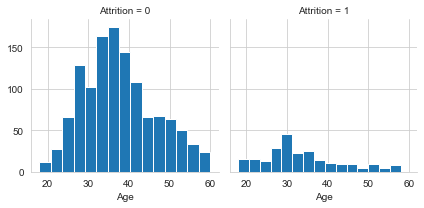

In [31]:
g = sns.FacetGrid(df, col='Attrition')
g.map(plt.hist, 'Age', bins=15)

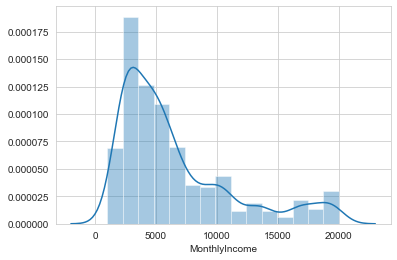

In [32]:
sns.distplot(df['MonthlyIncome'], bins = 15)

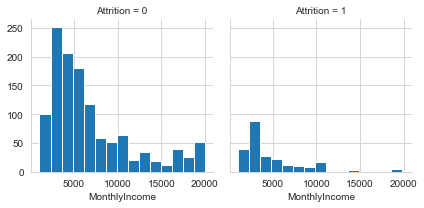

In [33]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df, col='Attrition')
g.map(plt.hist, 'MonthlyIncome', bins=15)

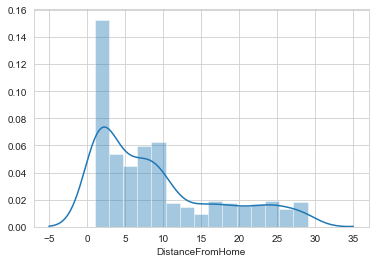

In [34]:
sns.distplot(df['DistanceFromHome'], bins = 15)

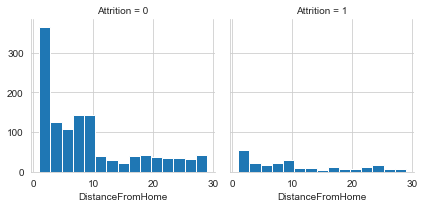

In [35]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df, col='Attrition')
g.map(plt.hist, 'DistanceFromHome', bins=15)

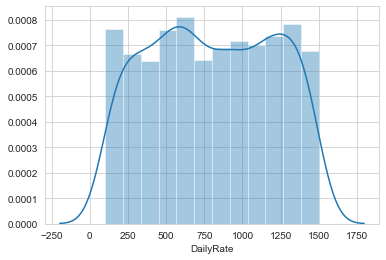

In [36]:
sns.distplot(df['DailyRate'])

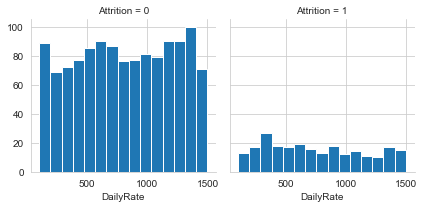

In [37]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df, col='Attrition')
g.map(plt.hist, 'DailyRate', bins=15)

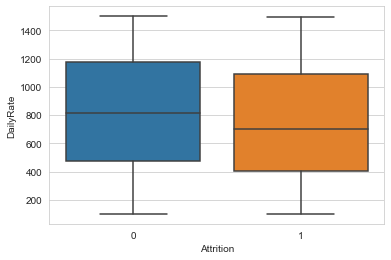

In [38]:
sns.boxplot(df['Attrition'],df['DailyRate'])

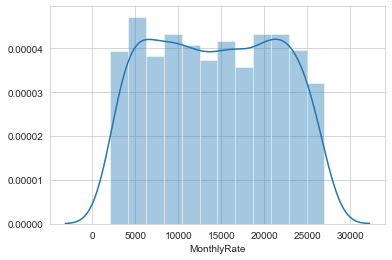

In [39]:
sns.distplot(df['MonthlyRate'])

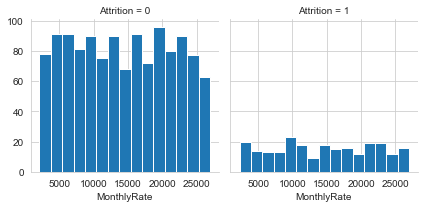

In [40]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df, col='Attrition')
g.map(plt.hist, 'MonthlyRate', bins=15)

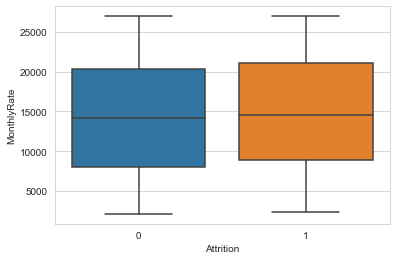

In [41]:
sns.boxplot(df['Attrition'],df['MonthlyRate'])

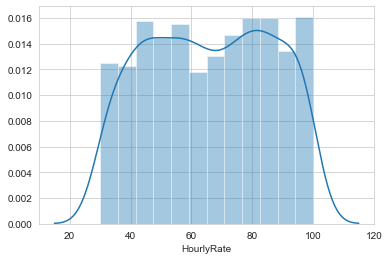

In [42]:
sns.distplot(df['HourlyRate'])

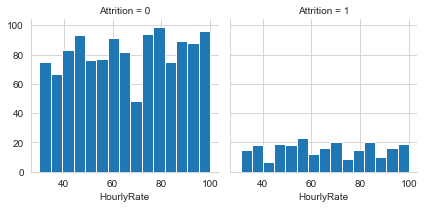

In [43]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df, col='Attrition')
g.map(plt.hist, 'HourlyRate', bins=15)

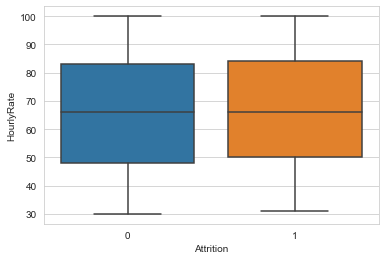

In [44]:
sns.boxplot(df['Attrition'],df['HourlyRate'])

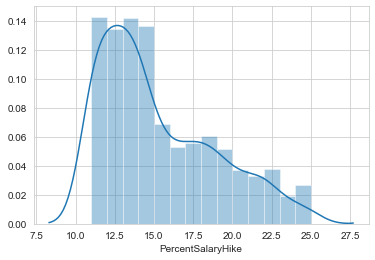

In [45]:
sns.distplot(df['PercentSalaryHike'])

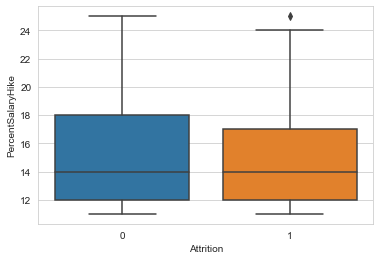

In [46]:
sns.boxplot(df['Attrition'],df['PercentSalaryHike'])

# This column have similar distribution so, can be eliminated

In [47]:
numerical_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

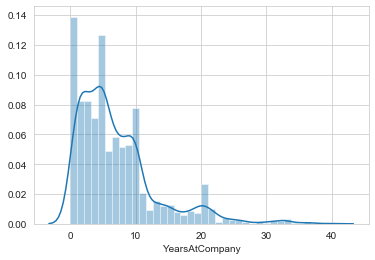

In [48]:
sns.distplot(df['YearsAtCompany'])

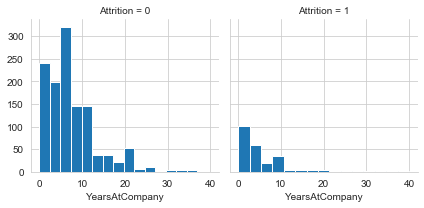

In [49]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df, col='Attrition')
g.map(plt.hist, 'YearsAtCompany', bins=15)

# Freshers at particular company have higher attrition rate

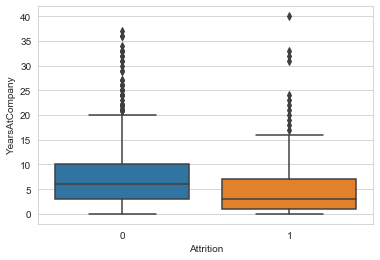

In [50]:
sns.boxplot(df['Attrition'],df['YearsAtCompany'])

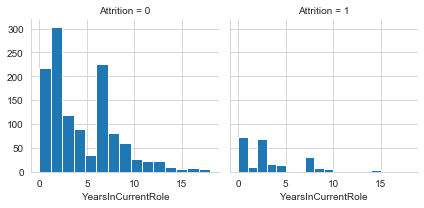

In [51]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df, col='Attrition')
g.map(plt.hist, 'YearsInCurrentRole', bins=15)

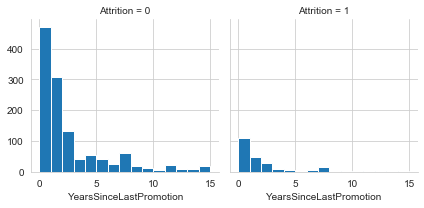

In [52]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df, col='Attrition')
g.map(plt.hist, 'YearsSinceLastPromotion', bins=15)

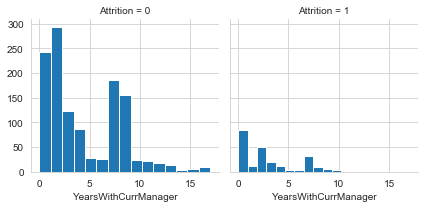

In [53]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df, col='Attrition')
g.map(plt.hist, 'YearsWithCurrManager', bins=15)

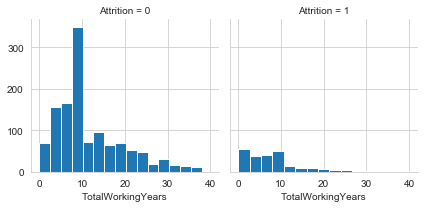

In [54]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df, col='Attrition')
g.map(plt.hist, 'TotalWorkingYears', bins=15)

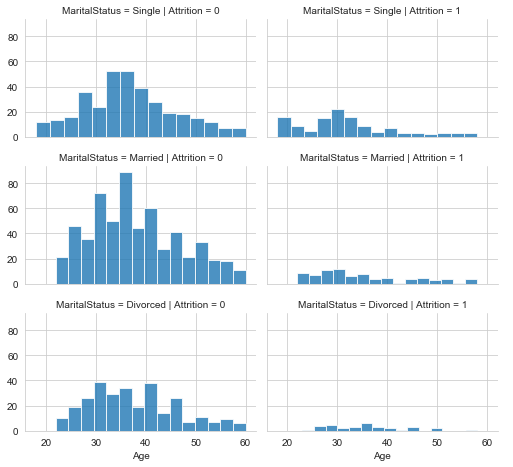

In [55]:
grid = sns.FacetGrid(df, col='Attrition', row='MaritalStatus', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.8, bins=15)
grid.add_legend();

# People with Marital Status as 'Single' and too within age group of 28-34 has higher attrition rate

In [56]:
df[['Education', 'Attrition']].groupby(['Education'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,Education,Attrition
0,1,0.182353
2,3,0.173077
1,2,0.156028
3,4,0.145729
4,5,0.104167


# Bachelors and below bachelors have higher attrition rate

In [57]:
df[['EnvironmentSatisfaction', 'Attrition']].groupby(['EnvironmentSatisfaction'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,EnvironmentSatisfaction,Attrition
0,1,0.253521
1,2,0.149826
2,3,0.136865
3,4,0.134529


In [58]:
df[['JobInvolvement', 'Attrition']].groupby(['JobInvolvement'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,JobInvolvement,Attrition
0,1,0.337349
1,2,0.189333
2,3,0.144009
3,4,0.090278


In [59]:
df[['JobLevel', 'Attrition']].groupby(['JobLevel'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,JobLevel,Attrition
0,1,0.263352
2,3,0.146789
1,2,0.097378
4,5,0.072464
3,4,0.047170


In [60]:
df[['JobSatisfaction', 'Attrition']].groupby(['JobSatisfaction'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,JobSatisfaction,Attrition
0,1,0.228374
2,3,0.165158
1,2,0.164286
3,4,0.113290


# Environmental Satisfaction, Job Satisfaction, Job Level Plays Huge role in Attrition Rate of the Employees

In [61]:
df[['NumCompaniesWorked', 'Attrition']].groupby(['NumCompaniesWorked'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,NumCompaniesWorked,Attrition
5,5,0.253968
9,9,0.230769
7,7,0.229730
6,6,0.228571
1,1,0.188100
8,8,0.122449
4,4,0.122302
0,0,0.116751
2,2,0.109589
3,3,0.100629


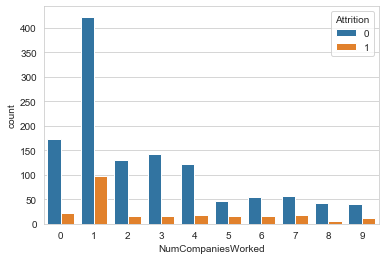

In [62]:
sns.countplot(df['NumCompaniesWorked'], hue = df['Attrition'])

In [63]:
df[['PerformanceRating', 'Attrition']].groupby(['PerformanceRating'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,PerformanceRating,Attrition
1,4,0.163717
0,3,0.160772


# This feature can be eliminated as they have equal attrition and only 2 ratings

In [64]:
df[['RelationshipSatisfaction', 'Attrition']].groupby(['RelationshipSatisfaction'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,RelationshipSatisfaction,Attrition
0,1,0.206522
2,3,0.154684
1,2,0.148515
3,4,0.148148


In [65]:
df[['StockOptionLevel', 'Attrition']].groupby(['StockOptionLevel'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,StockOptionLevel,Attrition
0,0,0.244057
3,3,0.176471
1,1,0.093960
2,2,0.075949


In [66]:
df[['TrainingTimesLastYear', 'Attrition']].groupby(['TrainingTimesLastYear'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,TrainingTimesLastYear,Attrition
0,0,0.277778
4,4,0.211382
2,2,0.179159
3,3,0.140530
1,1,0.126761
5,5,0.117647
6,6,0.092308


In [67]:
df[['WorkLifeBalance', 'Attrition']].groupby(['WorkLifeBalance'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,WorkLifeBalance,Attrition
0,1,0.312500
3,4,0.176471
1,2,0.168605
2,3,0.142217


In [68]:
numerical_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

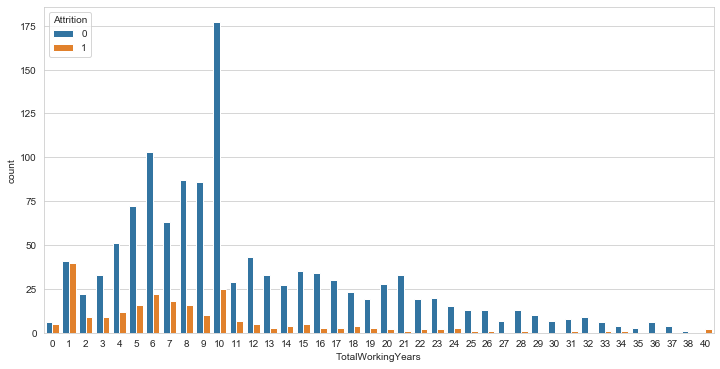

In [69]:
plt.figure(figsize = (12,6))
sns.countplot(df['TotalWorkingYears'], hue = df['Attrition'])

In [70]:
#Drop these as there are only 1 type of value in whole variable
df.drop(['HourlyRate', 'MonthlyRate','DailyRate','PerformanceRating'], axis = 1, inplace = True)

In [71]:
from scipy.stats import norm, skew
numerical_features.remove('EmployeeNumber')
numerical_features.remove('HourlyRate')
numerical_features.remove('MonthlyRate')
numerical_features.remove('DailyRate')
skewed_feat = df[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame({'Skew' :skewed_feat})
skewness.head(10)

,Skew
YearsSinceLastPromotion,1.982265
YearsAtCompany,1.762728
MonthlyIncome,1.368419
TotalWorkingYears,1.116032
DistanceFromHome,0.957140
YearsInCurrentRole,0.916427
YearsWithCurrManager,0.832600
PercentSalaryHike,0.820290
Age,0.412864


In [72]:
skewness = skewness[abs(skewness) > 0.75]
from scipy.special import boxcox1p
skewed_features = skewness.index
lamda = 0.15
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat],lamda)

In [73]:
df['New_feature'] = (df['Gender'].astype(str) + '_' + df['MaritalStatus'].astype(str))

In [74]:
df.drop(['Gender', 'MaritalStatus'], axis = 1, inplace = True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   object 
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   float64
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   object 
 7   EmployeeNumber            1470 non-null   int64  
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   JobInvolvement            1470 non-null   int64  
 10  JobLevel                  1470 non-null   int64  
 11  JobRole                   1470 non-null   object 
 12  JobSatisfaction           1470 non-null   int64  
 13  MonthlyIncome             1470 non-null   float64
 14  NumCompa

In [76]:
df.shape

(1470, 27)

In [77]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,New_feature
0,5.012077,1,Travel_Rarely,Sales,0.730463,2,Life Sciences,1,2,3,2,Sales Executive,4,17.912449,8,Yes,3.011340,1,0,2.602594,0,1,2.259674,1.820334,0.000000,2.055642,Female_Single
1,5.321541,0,Travel_Frequently,Research & Development,2.602594,1,Life Sciences,2,3,2,2,Research Scientist,2,17.345925,1,No,4.071754,4,1,2.885846,3,3,2.885846,2.440268,0.730463,2.440268,Male_Married
2,4.838059,1,Travel_Rarely,Research & Development,1.194318,2,Other,4,4,2,1,Laboratory Technician,3,14.320888,6,Yes,3.438110,2,0,2.440268,3,3,0.000000,0.000000,0.000000,0.000000,Male_Single
3,4.647709,0,Travel_Frequently,Research & Development,1.540963,4,Life Sciences,5,4,3,1,Research Scientist,3,15.387603,1,Yes,3.011340,3,0,2.602594,3,3,2.602594,2.440268,1.540963,0.000000,Female_Married
4,4.322948,0,Travel_Rarely,Research & Development,1.194318,1,Medical,7,1,3,1,Laboratory Technician,2,15.976616,9,No,3.128239,4,1,2.259674,3,3,1.194318,1.194318,1.194318,1.194318,Male_Married


Text(0.5, 1, 'Heatmap for Correlation between Features')

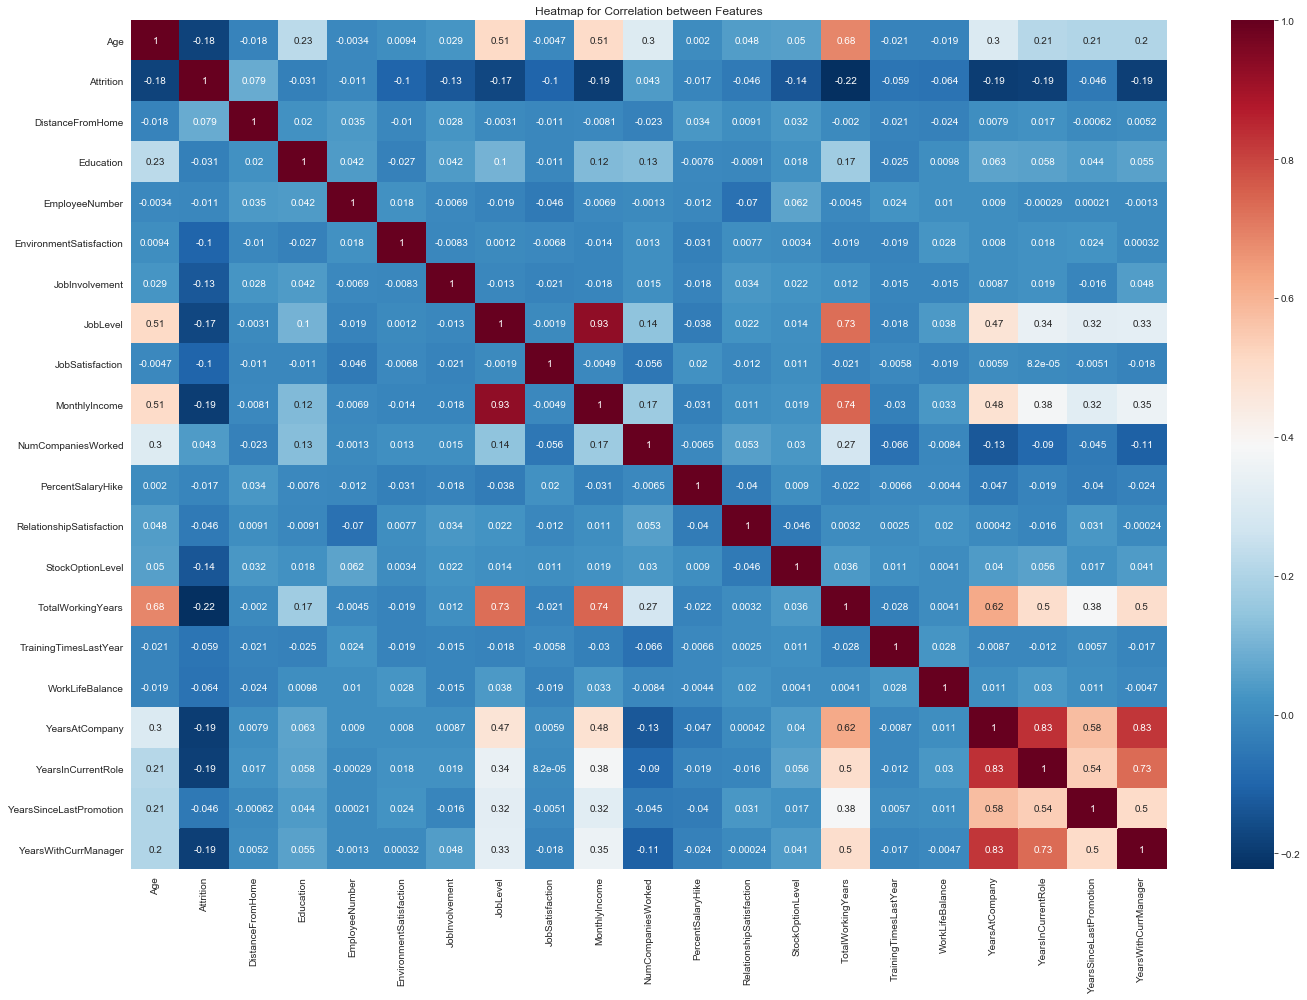

In [78]:
#Checking correaltions between variables
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
k_corr_matrix1 =df.corr()
plt.figure(figsize=(20,14))
sns.heatmap(k_corr_matrix1, annot=True, cmap=plt.cm.RdBu_r)
plt.title('Heatmap for Correlation between Features')

In [79]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [80]:
corr_features = correlation(df, 0.7)
len(set(corr_features))

4

In [81]:
corr_features

{'MonthlyIncome',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsWithCurrManager'}

# Removed job level instead of Monthly Income as both are highly correlated and any one of them can be dropeed

In [82]:
corr_features.remove('MonthlyIncome')
corr_features.remove('TotalWorkingYears')

In [83]:
corr_features.update(['JobLevel'])

In [84]:
corr_features

{'JobLevel', 'YearsInCurrentRole', 'YearsWithCurrManager'}

In [85]:
df.drop(corr_features, axis=1, inplace = True)

In [86]:
df.shape

(1470, 24)

In [87]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
len(categorical_features)

6

In [88]:
#Label-Encoding ordinal categorical features 
from sklearn.preprocessing import LabelEncoder
for c in categorical_features:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

# shape        
print('Shape all_data: {}'.format(df.shape))

Shape all_data: (1470, 24)


In [89]:
from sklearn.model_selection import train_test_split
Id_train = df['EmployeeNumber']
X = df.drop(['Attrition', 'EmployeeNumber'], axis = 1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [90]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [91]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
cv = StratifiedKFold(n_splits = 5, random_state = None, shuffle = False)

In [92]:
# Using random forest on balanced dataset
rf = RandomForestClassifier()
param_grid=dict(n_estimators= [120, 300, 500, 800, 1200],max_depth=range(1,20), min_samples_split = [1, 2, 5, 10, 15, 100],
               min_samples_leaf = [1,2,5,10], max_features = ['log2', 'sqrt', None])
grid_rf = RandomizedSearchCV(rf, param_grid, cv=cv, scoring = 'f1_macro')
grid_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': range(1, 20),
                                        'max_features': ['log2', 'sqrt', None],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [1, 2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [120, 300, 500, 800,
                                                         1200]},
                   scoring='f1_macro')

In [93]:
# Check out best parameters and best score
print(grid_rf.best_score_)
print(grid_rf.best_params_)

0.6331942571817416
{'n_estimators': 1200, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 13}


In [94]:
# Using random forest on balanced dataset
rf = RandomForestClassifier(class_weight={0:1,1:5}, random_state = 42)
param_grid=dict(n_estimators= [120, 300, 500, 800, 1200],max_depth=range(1,20), min_samples_split = [1, 2, 5, 10, 15, 100],
               min_samples_leaf = [1,2,5,10], max_features = ['log2', 'sqrt', None])
grid_rf = RandomizedSearchCV(rf, param_grid, cv=cv, scoring = 'f1_macro')
grid_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(class_weight={0: 1, 1: 5},
                                                    random_state=42),
                   param_distributions={'max_depth': range(1, 20),
                                        'max_features': ['log2', 'sqrt', None],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [1, 2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [120, 300, 500, 800,
                                                         1200]},
                   scoring='f1_macro')

In [95]:
# Check out best parameters and best score
print(grid_rf.best_score_)
print(grid_rf.best_params_)

0.7103203512015648
{'n_estimators': 1200, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_features': None, 'max_depth': 13}


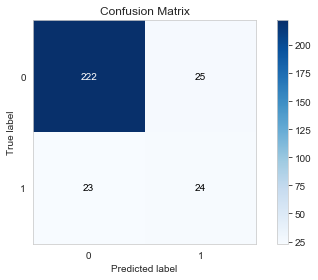

In [96]:
!pip install scikit-plot
import scikitplot as skplt
y_test_pred = grid_rf.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred)

In [97]:
from sklearn.metrics import classification_report

In [98]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       247
           1       0.49      0.51      0.50        47

    accuracy                           0.84       294
   macro avg       0.70      0.70      0.70       294
weighted avg       0.84      0.84      0.84       294



In [99]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_test_pred)

0.7047118614867774

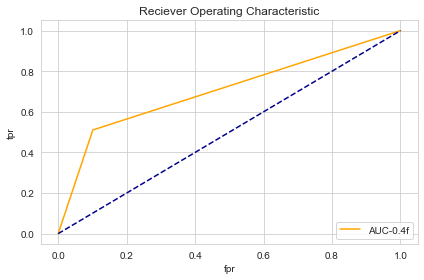

In [100]:
from sklearn import metrics
fpr,tpr,threshold=metrics.roc_curve(y_test, y_test_pred)
rou_auc=metrics.auc(fpr,tpr)
plt.title("Reciever Operating Characteristic")
plt.plot(fpr,tpr,"orange",label="AUC-0.4f" % rou_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],color="darkblue",linestyle="--")
plt.ylabel("tpr")
plt.xlabel("fpr")
plt.show()

In [101]:
!pip install xgboost
import xgboost
# Using xgboost on balanced dataset
xg = xgboost.XGBClassifier(scale_pos_weight = 5, random_state = 2) #scale_pos_weight for balancing dataset internally
# Hyper-parameters to be tuned
param_grid = dict(eta = [0.01,0.015, 0.025, 0.05, 0.1], learning_rate = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                  max_depth = [3,5,7,9,12,15,17,25], min_child_weight = [1,3,5,7], gamma = [0.05,0.1,0.3,0.5,0.7,0.9,1.0], 
                  colsample_bytree = [0.6, 0.7, 0.8, 0.9, 1.0], subsample = [0.6, 0.7, 0.8, 0.9, 1.0],
                  alpha = [0, 0.1, 0.5, 1.0])
grid_xg = RandomizedSearchCV(xg, param_grid, cv=cv, scoring = 'f1_macro')
grid_xg.fit(X_train,y_train)

[22:44:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=No...
                                           validate_parameters=None,
                                           verbosity=None),
                   param_distributions={'alpha': [0, 0.1, 0.5, 1.0],
                                        'colsample_bytree': [0.6, 0.7,

In [102]:
# Check out best parameters and best score
print(grid_xg.best_score_)
print(grid_xg.best_params_)

0.7294804949521891
{'subsample': 0.7, 'min_child_weight': 7, 'max_depth': 17, 'learning_rate': 0.25, 'gamma': 0.5, 'eta': 0.015, 'colsample_bytree': 0.7, 'alpha': 0.5}


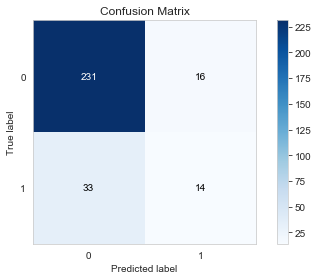

In [103]:
y_test_pred = grid_xg.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred)

In [104]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.90       247
           1       0.47      0.30      0.36        47

    accuracy                           0.83       294
   macro avg       0.67      0.62      0.63       294
weighted avg       0.81      0.83      0.82       294



In [105]:
roc_auc_score(y_test, y_test_pred)

0.6165475062451546

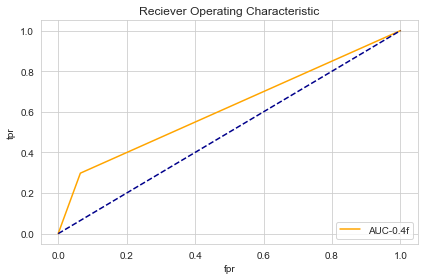

In [106]:
from sklearn import metrics
fpr,tpr,threshold=metrics.roc_curve(y_test, y_test_pred)
rou_auc=metrics.auc(fpr,tpr)
plt.title("Reciever Operating Characteristic")
plt.plot(fpr,tpr,"orange",label="AUC-0.4f" % rou_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],color="darkblue",linestyle="--")
plt.ylabel("tpr")
plt.xlabel("fpr")
plt.show()


In [107]:
!pip install imblearn 
from imblearn.ensemble import EasyEnsembleClassifier 
from collections import Counter

In [108]:
 import imblearn; imblearn.show_versions(github=True)

<details><summary>System, Dependency Information</summary>

**System Information**

* python    : `3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]`
* executable: `C:\Users\Nishkarsh\anaconda3\python.exe`
* machine   : `Windows-10-10.0.18362-SP0`

**Python Dependencies**

* pip       : `20.0.2`
* setuptools: `45.2.0.post20200210`
* imblearn  : `0.7.0`
* sklearn   : `0.23.2`
* numpy     : `1.18.1`
* scipy     : `1.4.1`
* Cython    : `0.29.15`
* pandas    : `1.0.1`
* keras     : `None`
* tensorflow: `None`
* joblib    : `0.14.1`

</details>


In [109]:
from imblearn.under_sampling import RandomUnderSampler
eec = EasyEnsembleClassifier(random_state=42)
eec.fit(X_train, y_train)

EasyEnsembleClassifier(random_state=42)

In [110]:
y_pred = eec.predict(X_test)

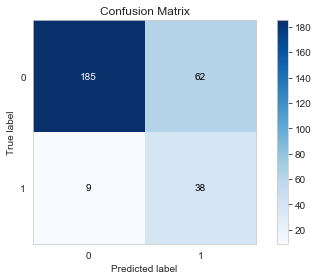

In [111]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       247
           1       0.38      0.81      0.52        47

    accuracy                           0.76       294
   macro avg       0.67      0.78      0.68       294
weighted avg       0.86      0.76      0.79       294



In [113]:
roc_auc_score(y_test, y_pred)

0.7787492462744423

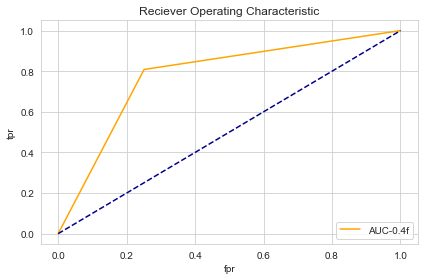

In [114]:
from sklearn import metrics
fpr,tpr,threshold=metrics.roc_curve(y_test, y_pred)
rou_auc=metrics.auc(fpr,tpr)
plt.title("Reciever Operating Characteristic")
plt.plot(fpr,tpr,"orange",label="AUC-0.4f" % rou_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],color="darkblue",linestyle="--")
plt.ylabel("tpr")
plt.xlabel("fpr")
plt.show()

In [115]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
param_grid = dict(C = [0.001, 0.01,1, 10, 100], penalty = ['l1', 'l2'])
grid_lr = RandomizedSearchCV(lr, param_grid, cv=cv, scoring = 'f1_macro')
grid_lr.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 1, 10, 100],
                                        'penalty': ['l1', 'l2']},
                   scoring='f1_macro')

In [116]:
# Check out best parameters and best score
print(grid_lr.best_score_)
print(grid_lr.best_params_)

0.705648655669272
{'penalty': 'l2', 'C': 100}


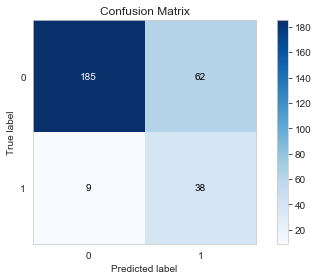

In [117]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [118]:
y_pred = grid_lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       247
           1       0.78      0.45      0.57        47

    accuracy                           0.89       294
   macro avg       0.84      0.71      0.75       294
weighted avg       0.88      0.89      0.88       294



In [119]:
roc_auc_score(y_test, y_pred)

0.7112585063312946

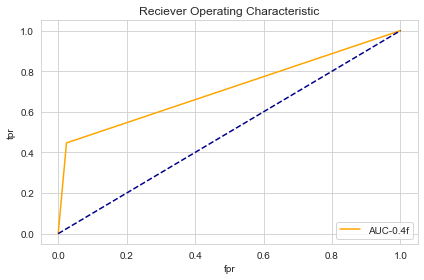

In [120]:
from sklearn import metrics
fpr,tpr,threshold=metrics.roc_curve(y_test, y_pred)
rou_auc=metrics.auc(fpr,tpr)
plt.title("Reciever Operating Characteristic")
plt.plot(fpr,tpr,"orange",label="AUC-0.4f" % rou_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],color="darkblue",linestyle="--")
plt.ylabel("tpr")
plt.xlabel("fpr")
plt.show()